In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

def configure_plots():
    '''Configures plots by making some quality of life adjustments'''
    for _ in range(2):
        plt.rcParams['figure.figsize'] = [16/2, 9/2]
        plt.rcParams['axes.titlesize'] = 20
        plt.rcParams['axes.labelsize'] = 16
        plt.rcParams['xtick.labelsize'] = 14
        plt.rcParams['ytick.labelsize'] = 14
        plt.rcParams['lines.linewidth'] = 2

configure_plots()

In [2]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt

med = pd.read_csv("../data/med.csv")
people = pd.read_csv("../data/people.csv")
combined= pd.read_csv("../data/combined.csv")

oldest_in_ed = people[people["Education Program"]==True]["Age"].max()
#print(f'Oldest age of a child in the education program: {oldest_in_ed}')

kids =  people[people["Age"] < 15]

percent_in_ed = np.round(np.mean(kids["Education Program"])*100, 2)
#print(f'Percent of kids participating in the education program: {percent_in_ed}%')

In [3]:
import seaborn as sns

def barplot(df, hue, x):
        data = df[[hue, x, "Gender"]] \
                .groupby([hue, x], as_index=False) \
                .aggregate('count')

        data = data.rename({'Gender': 'Proportion'}, axis=1)

        data.loc[data[hue], "Proportion"] = data[data[hue]]["Proportion"] / data[data[hue]]["Proportion"].sum()
        data.loc[data[hue]==False, "Proportion"] = data[data[hue]==False]["Proportion"] / data[data[hue]==False]["Proportion"].sum()

        sns.barplot(x=x, y="Proportion", hue=hue, data=data)

In [62]:
import datetime

def summarize_program(df, program): 

    print("Summarizing differences between groups:")

    percent_in = np.round(np.mean(df[program]==True)*100, 2)
    print(f'Percent participating in {program}: {percent_in}%')
    
    in_program = df[df[program]==True]
    no_program = df[df[program]==False]

    #Compare age between groups 
    mean_age = np.round(np.mean(in_program["Age At Fair"]),2)
    no_mean_age = np.round(np.mean(no_program["Age At Fair"]),2)
    print(f'Average age program: {mean_age}')
    print(f'Average age not: {no_mean_age}')

    #Compare gender between groups
    percent_male = np.round(np.mean(in_program["Gender"]=="m")*100, 2)
    no_percent_male = np.round(np.mean(no_program["Gender"]=="m")*100, 2)
    print(f'Percent male program: {percent_male}%')
    print(f'Percent male not: {no_percent_male}%')

    #Compare height between groups
    mean_height = np.round(np.mean(in_program["Height"]),2)
    no_mean_height = np.round(np.mean(no_program["Height"]),2)
    print(f'Average height program: {mean_height}')
    print(f'Average height not: {no_mean_height}')

    #Compare weight between groups
    mean_weight = np.round(np.mean(in_program["Weight"]),2)
    no_mean_weight = np.round(np.mean(no_program["Weight"]),2)
    print(f'Average weight program: {mean_weight}')
    print(f'Average weight not: {no_mean_weight}')

    print("\nComparing medical health between groups:")

    #compare bmi between groups
    mean_bmi = np.round(np.mean(in_program["Bmi"]),2)
    no_mean_bmi = np.round(np.mean(no_program["Bmi"]),2)

    print(f'Average bmi program: {mean_bmi}')
    print(f'Average bmi not: {no_mean_bmi}')

    #compare soda sugar between groups
    mean_sugar = np.round(np.mean(in_program["Soda Sugar"]),2)
    no_mean_sugar = np.round(np.mean(no_program["Soda Sugar"]),2)

    print(f'Average sugar program: {mean_sugar}')
    print(f'Average sugar not: {no_mean_sugar}')

    #compare blood sugar between groups
    mean_blood_sugar = np.round(np.mean(in_program[in_program["Fast"]==True]["Blood Sugar"]),2)
    no_mean_blood_sugar = np.round(np.mean(no_program[no_program["Fast"]==True]["Blood Sugar"]),2)

    print(f'Average blood sugar (among fasting) program: {mean_blood_sugar}')
    print(f'Average blood sugar (among fasting) not: {no_mean_blood_sugar}')

    print("\nComparing dental health between groups:")

    #Compare cavities between groups
    mean_cav = np.round(np.mean(in_program["Cavities"]),2)
    no_mean_cav = np.round(np.mean(no_program["Cavities"]),2)

    print(f'Average cavities program: {mean_cav}')
    print(f'Average cavities not: {no_mean_cav}')

    #compare missing between groups
    mean_miss = np.round(np.mean(in_program["Missing"]),2)
    no_mean_miss = np.round(np.mean(no_program["Missing"]),2)

    print(f'Average missing program: {mean_miss}')
    print(f'Average missing not: {no_mean_miss}')

    #f = plt.figure(figsize=(16, 16))

    barplot(df, program, "Oral Hygiene")
    plt.show()
    barplot(df, program, "Cavity Risk")
    plt.show()

    adult = in_program[in_program["Age At Fair"]>17]
    obese = adult[adult["Bmi"]>=30].shape[0]
    overweight = adult[(adult["Bmi"]>=25) & (adult["Bmi"]<30)].shape[0]
    healthy = adult[(adult["Bmi"]>=18.5) & (adult["Bmi"]<25)].shape[0]
    underweight = adult[adult["Bmi"]<18.5].shape[0]
    bmi_count = adult.dropna(subset="Bmi").shape[0]
    print("IN PROGRAM")
    print(f'Percent of adults obese: {np.round(obese/bmi_count*100,2)}%')
    print(f'Percent of adults overweight: {np.round(overweight/bmi_count*100,2)}%')
    print(f'Percent of adults healthy: {np.round(healthy/bmi_count*100,2)}%')
    print(f'Percent of adults underweight: {np.round(underweight/bmi_count*100,2)}%')

    adult = no_program[no_program["Age At Fair"]>17]
    obese = adult[adult["Bmi"]>=30].shape[0]
    overweight = adult[(adult["Bmi"]>=25) & (adult["Bmi"]<30)].shape[0]
    healthy = adult[(adult["Bmi"]>=18.5) & (adult["Bmi"]<25)].shape[0]
    underweight = adult[adult["Bmi"]<18.5].shape[0]
    bmi_count = adult.dropna(subset="Bmi").shape[0]
    print("OUT PROGRAM")
    print(f'Percent of adults obese: {np.round(obese/bmi_count*100,2)}%')
    print(f'Percent of adults overweight: {np.round(overweight/bmi_count*100,2)}%')
    print(f'Percent of adults healthy: {np.round(healthy/bmi_count*100,2)}%')
    print(f'Percent of adults underweight: {np.round(underweight/bmi_count*100,2)}%')



In [48]:
def summarize_difference(df, col, value): 

    index = [
        "Number",
        "Age", 
        "Male",
        "Height", 
        "Weight", 
        "Bmi", 
        "Sugar", 
        "Blood Sugar", 
        "Cavities", 
        "Missing"
    ]

    return_df = np.zeros((10, 2))
    return_df = pd.DataFrame(return_df, index=index, columns=["In", "Out"])
    
    df = df.dropna(subset=col)
    df_in = df[df[col]==value]
    df_out = df[df[col]!=value]

    n_in = df_in.shape[0]
    n_out = df_out.shape[0]
    return_df.loc["Number"]["In"] = n_in
    return_df.loc["Number"]["Out"] = n_out
    print(f'Number in = {n_in}')
    print(f'Number out = {n_out}')

    percent_in = np.round(np.mean(df[col]==value)*100, 2)
    print(f'Percent {col}=={value}: {percent_in}%')

    #Compare age between groups 
    mean_age = np.round(np.mean(df_in["Age At Fair"]),2)
    no_mean_age = np.round(np.mean(df_out["Age At Fair"]),2)
    return_df.loc["Age"]["In"] = mean_age
    return_df.loc["Age"]["Out"] = no_mean_age
    print(f'Average age in: {mean_age}')
    print(f'Average age out: {no_mean_age}')

    #Compare gender between groups
    percent_male = np.round(np.mean(df_in["Gender"]=="m")*100, 2)
    no_percent_male = np.round(np.mean(df_out["Gender"]=="m")*100, 2)
    return_df.loc["Male"]["In"] = percent_male
    return_df.loc["Male"]["Out"] = no_percent_male
    print(f'Percent male in: {percent_male}%')
    print(f'Percent male out: {no_percent_male}%')

    #Compare height between groups
    mean_height = np.round(np.mean(df_in["Height"]),2)
    no_mean_height = np.round(np.mean(df_out["Height"]),2)
    return_df.loc["Height"]["In"] = mean_height
    return_df.loc["Height"]["Out"] = no_mean_height
    print(f'Average height in: {mean_height}')
    print(f'Average height out: {no_mean_height}')

    #Compare weight between groups
    mean_weight = np.round(np.mean(df_in["Weight"]),2)
    no_mean_weight = np.round(np.mean(df_out["Weight"]),2)
    return_df.loc["Weight"]["In"] = mean_weight
    return_df.loc["Weight"]["Out"] = no_mean_weight
    print(f'Average weight in: {mean_weight}')
    print(f'Average weight out: {no_mean_weight}')

    print("\nComparing medical health between groups:")

    #compare bmi between groups
    mean_bmi = np.round(np.mean(df_in["Bmi"]),2)
    no_mean_bmi = np.round(np.mean(df_out["Bmi"]),2)
    return_df.loc["Bmi"]["In"] = mean_bmi
    return_df.loc["Bmi"]["Out"] = no_mean_bmi
    print(f'Average bmi in: {mean_bmi}')
    print(f'Average bmi out: {no_mean_bmi}')

    #compare soda sugar between groups
    mean_sugar = np.round(np.mean(df_in["Soda Sugar"]),2)
    no_mean_sugar = np.round(np.mean(df_out["Soda Sugar"]),2)
    return_df.loc["Sugar"]["In"] = mean_sugar
    return_df.loc["Sugar"]["Out"] = no_mean_sugar
    print(f'Average sugar in: {mean_sugar}')
    print(f'Average sugar out: {no_mean_sugar}')

    #compare blood sugar between groups
    mean_blood_sugar = np.round(np.mean(df_in["Blood Sugar"]),2)
    no_mean_blood_sugar = np.round(np.mean(df_out["Blood Sugar"]),2)
    return_df.loc["Blood Sugar"]["In"] = mean_blood_sugar
    return_df.loc["Blood Sugar"]["Out"] = no_mean_blood_sugar
    print(f'Average blood sugar in: {mean_blood_sugar}')
    print(f'Average blood sugar out: {no_mean_blood_sugar}')

    print("\nComparing dental health between groups:")

    #Compare cavities between groups
    mean_cav = np.round(np.mean(df_in["Cavities"]),2)
    no_mean_cav = np.round(np.mean(df_out["Cavities"]),2)
    return_df.loc["Cavities"]["In"] = mean_cav
    return_df.loc["Cavities"]["Out"] = no_mean_cav
    print(f'Average cavities in: {mean_cav}')
    print(f'Average cavities out: {no_mean_cav}')

    #compare missing between groups
    mean_miss = np.round(np.mean(df_in["Missing"]),2)
    no_mean_miss = np.round(np.mean(df_out["Missing"]),2)
    return_df.loc["Missing"]["In"]
    return_df.loc["Missing"]["Out"]
    print(f'Average missing in: {mean_miss}')
    print(f'Average missing out: {no_mean_miss}\n')

    return return_df


------------ANALYSIS FOR 2021-05-01------------
Number in = 63
Number out = 41
Percent Birth State==sonora: 60.58%
Average age in: 13.77
Average age out: 26.71
Percent male in: 46.03%
Percent male out: 31.71%
Average height in: 132.02
Average height out: 145.16
Average weight in: 43.79
Average weight out: 56.08

Comparing medical health between groups:
Average bmi in: 21.63
Average bmi out: 25.19
Average sugar in: 61.45
Average sugar out: 83.41
Average blood sugar in: 94.09
Average blood sugar out: 108.62

Comparing dental health between groups:
Average cavities in: 2.28
Average cavities out: 1.48
Average missing in: 0.39
Average missing out: 0.86

------------ANALYSIS FOR 2021-11-01------------
Number in = 105
Number out = 95
Percent Birth State==sonora: 52.5%
Average age in: 14.59
Average age out: 28.13
Percent male in: 44.76%
Percent male out: 30.53%
Average height in: 131.34
Average height out: 143.03
Average weight in: 43.78
Average weight out: 55.3

Comparing medical health betwe

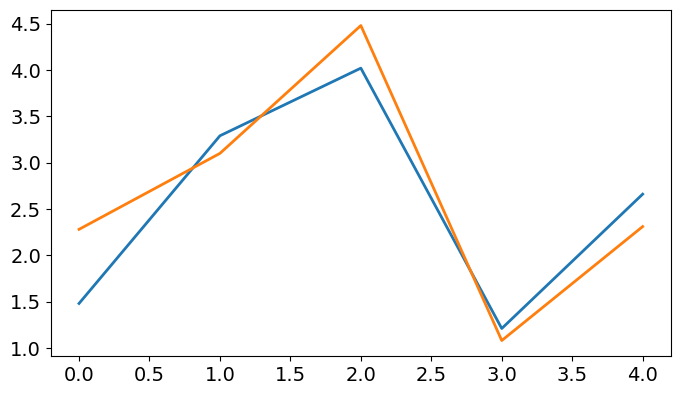

In [58]:
df_list = []
for date in np.sort(combined["Date"].unique()): 
    df = combined[combined["Date"] == date]
    print("---"*4 + f"ANALYSIS FOR {date}" + "---"*4)
    return_df = summarize_difference(df, "Birth State", "sonora")
    df_list.append(return_df)

number_in = []
number_out = []
age_in = []
age_out = []
male_in = []
male_out = []
height_in = []
height_out = []
weight_in = []
weight_out = []
bmi_in = []
bmi_out = []
sugar_in = []
sugar_out = []
blood_sugar_in = []
blood_sugar_out = []
cavities_in = []
cavities_out = []
missing_in = []
missing_out = []

for df in df_list: 
    number_in.append(df.loc["Number"]["In"])
    number_out.append(df.loc["Number"]["Out"])
    age_in.append(df.loc["Age"]["In"])
    age_out.append(df.loc["Age"]["Out"])
    male_in.append(df.loc["Male"]["In"])
    male_out.append(df.loc["Male"]["Out"])
    height_in.append(df.loc["Height"]["In"])
    height_out.append(df.loc["Height"]["Out"])
    weight_in.append(df.loc["Weight"]["In"])
    weight_out.append(df.loc["Weight"]["Out"])
    bmi_in.append(df.loc["Bmi"]["In"])
    bmi_out.append(df.loc["Bmi"]["Out"])
    sugar_in.append(df.loc["Sugar"]["In"])
    sugar_out.append(df.loc["Sugar"]["Out"])
    blood_sugar_in.append(df.loc["Blood Sugar"]["In"])
    blood_sugar_out.append(df.loc["Blood Sugar"]["Out"])
    cavities_in.append(df.loc["Cavities"]["In"])
    cavities_out.append(df.loc["Cavities"]["Out"])
    missing_in.append(df.loc["Missing"]["In"])
    missing_out.append(df.loc["Missing"]["Out"])

plt.plot(cavities_out)
plt.plot(cavities_in)
plt.show()
    

In [5]:
med_to_merge = med.reset_index().set_index("Individual Id")
kids_med = kids.merge(med, on="Individual Id", how="left")

#Adding age at fair
combined_filtered = combined.reset_index().set_index("Individual Id")["Age At Fair"]
kids_med = kids_med.merge(combined_filtered, on="Individual Id", how="left")

kids_med_23 = kids_med[kids_med["Date"] == str(datetime.date(2023, 4, 1))]

----------------------------------------------------------------------
ANALYSIS 4/23 FEED A FAMILY

Summarizing differences between groups:
Percent participating in Feed A Family: 76.92%
Average age program: 20.47
Average age not: 19.86
Percent male program: 30.0%
Percent male not: 55.0%
Average height program: 135.87
Average height not: 144.35
Average weight program: 47.51
Average weight not: 58.78

Comparing medical health between groups:
Average bmi program: 23.37
Average bmi not: 25.56
Average sugar program: 36.37
Average sugar not: 35.68
Average blood sugar (among fasting) program: 108.69
Average blood sugar (among fasting) not: 101.57

Comparing dental health between groups:
Average cavities program: 2.39
Average cavities not: 2.72
Average missing program: 1.46
Average missing not: 1.31


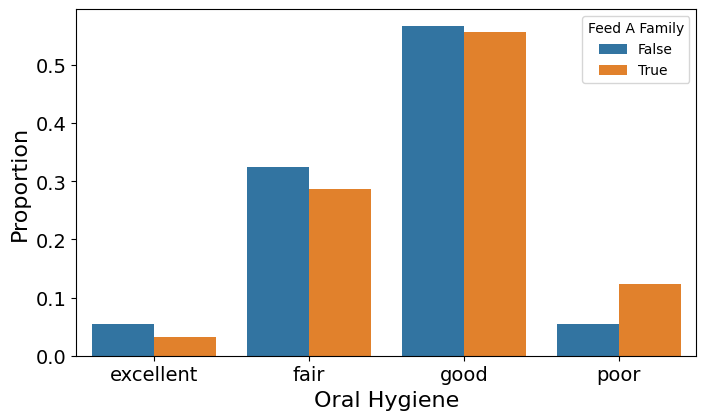

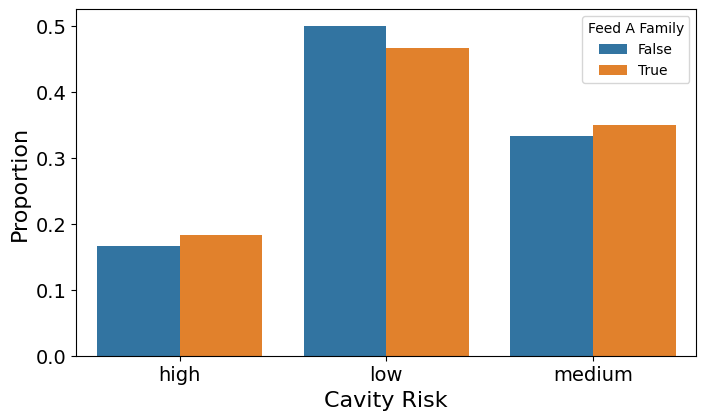

IN PROGRAM
Percent of adults obese: 50.94%
Percent of adults overweight: 30.19%
Percent of adults healthy: 18.87%
Percent of adults underweight: 0.0%
OUT PROGRAM
Percent of adults obese: 46.67%
Percent of adults overweight: 20.0%
Percent of adults healthy: 13.33%
Percent of adults underweight: 20.0%


In [63]:
print("--------------"*5)
print("ANALYSIS 4/23 FEED A FAMILY\n")
combined23 = combined[combined["Date"] == str(datetime.date(2023, 4, 1))]
summarize_program(combined23, "Feed A Family")

----------------------------------------------------------------------
ANALYSIS 4/23 SUPER SATURDAY PROGRAM

Summarizing differences between groups:
Percent participating in Super Saturday: 77.47%
Average age program: 20.41
Average age not: 19.86
Percent male program: 30.5%
Percent male not: 55.0%
Average height program: 136.0
Average height not: 144.35
Average weight program: 47.44
Average weight not: 58.78

Comparing medical health between groups:
Average bmi program: 23.32
Average bmi not: 25.56
Average sugar program: 36.1
Average sugar not: 35.68
Average blood sugar (among fasting) program: 108.69
Average blood sugar (among fasting) not: 101.57

Comparing dental health between groups:
Average cavities program: 2.37
Average cavities not: 2.72
Average missing program: 1.45
Average missing not: 1.31


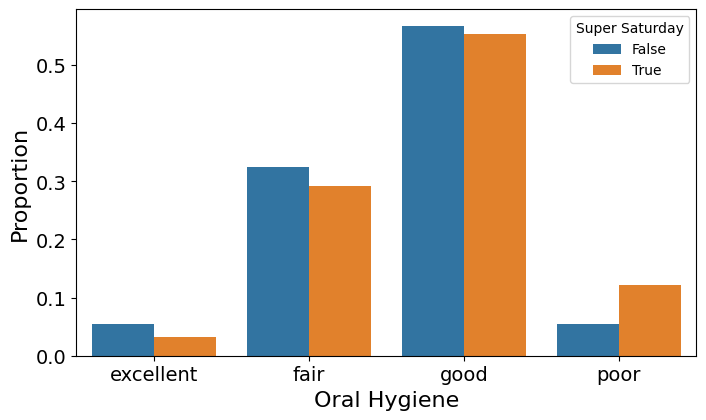

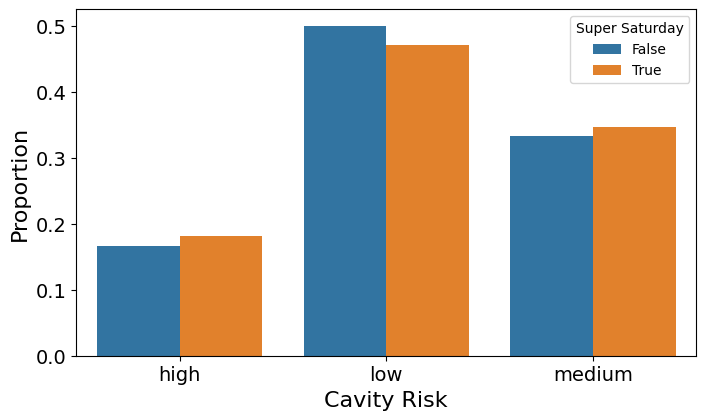

IN PROGRAM
Percent of adults obese: 50.94%
Percent of adults overweight: 30.19%
Percent of adults healthy: 18.87%
Percent of adults underweight: 0.0%
OUT PROGRAM
Percent of adults obese: 46.67%
Percent of adults overweight: 20.0%
Percent of adults healthy: 13.33%
Percent of adults underweight: 20.0%


In [64]:
print("--------------"*5)
print("ANALYSIS 4/23 SUPER SATURDAY PROGRAM\n")
summarize_program(combined23, "Super Saturday")

In [65]:
print("--------------"*5)
print("ANALYSIS 4/23 EDUCATION PROGRAM")
print("(Population is all kids 14 and under)\n")
summarize_program(kids_med_23, "Education Program")

----------------------------------------------------------------------
ANALYSIS 4/23 EDUCATION PROGRAM
(Population is all kids 14 and under)



NameError: name 'kids_med_23' is not defined

In [ ]:
print("--------------"*5)
print("ANALYSIS 4/23 EDUCATION PROGRAM")
print("(Population is all kids 14 and under)\n")
summarize_program(kids_med_23, "Education Program")

In [9]:

#combined422 = combined[combined["Date"] == str(datetime.date(2022, 4, 1))]
#summarize_program(combined422, "Super Saturday")

#print("--------------"*5)
#print("ANALYSIS 4/23 SUPER SATURDAY PROGRAM\n")
#summarize_program(combined23, "Super Saturday")

#jupyter nbconvert notebooks/med_analysis.ipynb --to html --TemplateExporter.exclude_input=True

---------------------ANALYSIS FOR DATE 2022-04-01---------------------
Average Adult Bmi: 32.0439853648838
Average Child Bmi: 18.82629065993775
Average cavities: 4.232142857142857
Average sugar: 22.448868131868135
Averge blood sugar: 132.30769230769232
Average missing: 4.739130434782608
---------------------ANALYSIS FOR DATE 2022-11-01---------------------
Average Adult Bmi: 31.920462627779283
Average Child Bmi: 19.119344951492305
Average cavities: 1.1758241758241759
Average sugar: 23.546113502935423
Averge blood sugar: 125.83720930232558
Average missing: 0.0
---------------------ANALYSIS FOR DATE 2023-04-01---------------------
Average Adult Bmi: 31.82288787771454
Average Child Bmi: 19.594994472859703
Average cavities: 2.5113636363636362
Average sugar: 29.340288924558585
Averge blood sugar: 113.76
Average missing: 1.9069767441860466


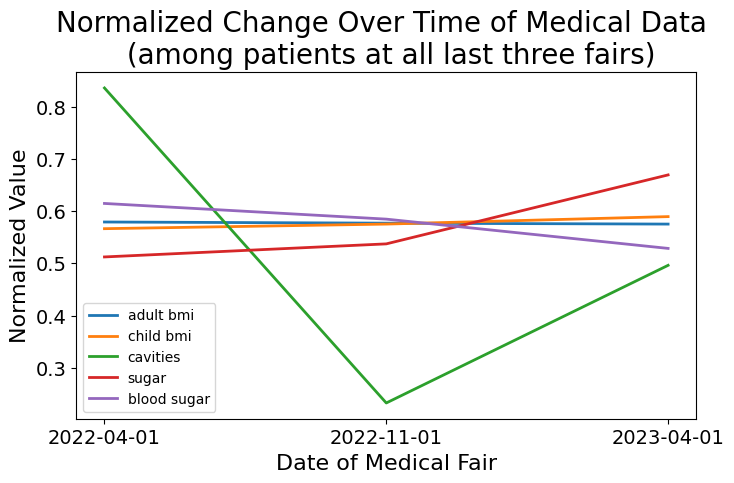

In [61]:
###Finding all people who have been to the past three medical fairs 
from sklearn.preprocessing import normalize

recent_dates = [str(datetime.date(2022, 4, 1)), str(datetime.date(2022, 11, 1)), str(datetime.date(2023, 4, 1))]
recent = combined[combined["Date"].isin(recent_dates)]

list = recent["Individual Id"].to_list() 
counts = {x:list.count(x) for x in list}

all = []
for id in np.unique(list): 
    if counts[id] == 3: 
        all.append(id)

recent_fairs = recent[recent["Individual Id"].isin(all)]
recent_fairs.sort_values("Individual Id")

bmi_list = []
cav_list = []
sugar_list = []
blood_sugar_list = []
missing_list = []
child_bmi_list = []

for date in np.sort(recent_fairs["Date"].unique()): 
    df = recent_fairs[recent_fairs["Date"] == date]
    print("-------"*3 + f"ANALYSIS FOR DATE {date}" + "-------"*3)
    adult_bmi = np.mean(df[df["Age At Fair"]>18]["Bmi"])
    print(f"Average Adult Bmi: {adult_bmi}")
    bmi_list.append(adult_bmi)

    child_bmi = np.mean(df[df["Age At Fair"]<=18]["Bmi"])
    print(f"Average Child Bmi: {child_bmi}")
    child_bmi_list.append(child_bmi)

    cavities = np.mean(df["Cavities"])
    print(f"Average cavities: {cavities}")
    cav_list.append(cavities)

    sugar = np.mean(df["Soda Sugar"])
    print(f"Average sugar: {sugar}")
    sugar_list.append(sugar)

    blood_sugar = np.mean(df["Blood Sugar"])
    print(f"Averge blood sugar: {blood_sugar}")
    blood_sugar_list.append(blood_sugar)

    missing = np.mean(df["Missing"])
    print(f"Average missing: {missing}")
    missing_list.append(missing)


bmi_list = normalize(np.array(bmi_list).reshape(-1, 1), axis=0)
cav_list = normalize(np.array(cav_list).reshape(-1, 1), axis=0)
sugar_list = normalize(np.array(sugar_list).reshape(-1, 1), axis=0)
blood_sugar_list = normalize(np.array(blood_sugar_list).reshape(-1, 1), axis=0)
missing_list = normalize(np.array(missing_list).reshape(-1, 1), axis=0)
child_bmi_list = normalize(np.array(child_bmi_list).reshape(-1, 1), axis=0)


plt.title("Normalized Change Over Time of Medical Data \n (among patients at all last three fairs)")

plt.plot(bmi_list)
plt.plot(child_bmi_list)
plt.plot(cav_list)
plt.plot(sugar_list)
plt.plot(blood_sugar_list)
#plt.plot(missing_list)
plt.legend(["adult bmi", "child bmi", "cavities", "sugar", "blood sugar"])
plt.xticks([0, 1, 2], [recent_dates[0], recent_dates[1], recent_dates[2]])
plt.ylabel("Normalized Value")
plt.xlabel("Date of Medical Fair")
plt.show()

In [30]:

def longitudinal_program(df, col):

    df_in = df[df[col]==True] 

    bmi_list = []
    cav_list = []
    sugar_list = []
    blood_sugar_list = []
    missing_list = []
    child_bmi_list = []

    for date in np.sort(df_in["Date"].unique()): 
        df = df_in[df_in["Date"] == date]
        print("-------"*3 + f"ANALYSIS FOR DATE {date}" + "-------"*3)
        adult_bmi = np.mean(df[df["Age At Fair"]>18]["Bmi"])
        print(f"Average Adult Bmi: {adult_bmi}")
        bmi_list.append(adult_bmi)

        child_bmi = np.mean(df[df["Age At Fair"]<=18]["Bmi"])
        print(f"Average Child Bmi: {child_bmi}")
        child_bmi_list.append(child_bmi)

        cavities = np.mean(df["Cavities"])
        print(f"Average cavities: {cavities}")
        cav_list.append(cavities)

        sugar = np.mean(df["Soda Sugar"])
        print(f"Average sugar: {sugar}")
        sugar_list.append(sugar)

        blood_sugar = np.mean(df["Blood Sugar"])
        print(f"Averge blood sugar: {blood_sugar}")
        blood_sugar_list.append(blood_sugar)

        missing = np.mean(df["Missing"])
        print(f"Average missing: {missing}")
        missing_list.append(missing)

    bmi_list = normalize(np.array(bmi_list).reshape(-1, 1), axis=0)
    cav_list = normalize(np.array(cav_list).reshape(-1, 1), axis=0)
    sugar_list = normalize(np.array(sugar_list).reshape(-1, 1), axis=0)
    blood_sugar_list = normalize(np.array(blood_sugar_list).reshape(-1, 1), axis=0)
    missing_list = normalize(np.array(missing_list).reshape(-1, 1), axis=0)
    child_bmi_list = normalize(np.array(child_bmi_list).reshape(-1, 1), axis=0)


    plt.title("Normalized Change Over Time of Medical Data \n (among patients at all last three fairs)")

    plt.plot(bmi_list)
    plt.plot(child_bmi_list)
    plt.plot(cav_list)
    plt.plot(sugar_list)
    plt.plot(blood_sugar_list)
    plt.legend(["adult bmi", "child bmi", "cavities", "sugar", "blood sugar"])
    plt.xticks([0, 1, 2], [recent_dates[0], recent_dates[1], recent_dates[2]])
    plt.ylabel("Normalized Value")
    plt.xlabel("Date of Medical Fair")
    plt.show()

---------------------ANALYSIS FOR DATE 2022-04-01---------------------
Average Adult Bmi: 31.925334247440823
Average Child Bmi: 18.41165744189953
Average cavities: 4.244897959183674
Average sugar: 23.28697402597403
Averge blood sugar: 129.51111111111112
Average missing: 3.9473684210526314
---------------------ANALYSIS FOR DATE 2022-11-01---------------------
Average Adult Bmi: 31.572173703732165
Average Child Bmi: 18.985201340097113
Average cavities: 1.0897435897435896
Average sugar: 23.120326530612243
Averge blood sugar: 128.64864864864865
Average missing: 0.0
---------------------ANALYSIS FOR DATE 2023-04-01---------------------
Average Adult Bmi: 31.346805278154427
Average Child Bmi: 19.28735314419568
Average cavities: 2.5
Average sugar: 29.031428571428574
Averge blood sugar: 115.16279069767442
Average missing: 1.7083333333333333


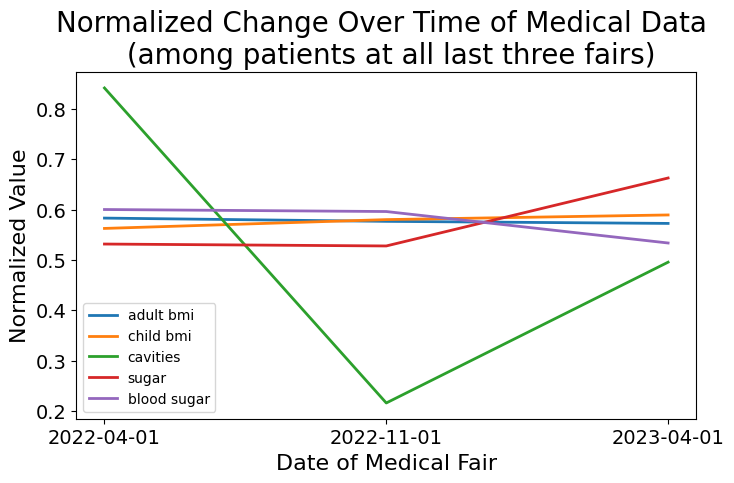

In [34]:
longitudinal_program(recent_fairs, "Super Saturday")

In [66]:
#Finding people who have been to all med fairs 
list = combined["Individual Id"].to_list() 
counts = {x:list.count(x) for x in list}

all = []
for id in np.unique(list): 
    if counts[id] == 5: 
        all.append(id)

all_fairs = combined[combined["Individual Id"].isin(all)]

all_fairs = all_fairs.sort_values("Individual Id")

bmi_list = []
cav_list = []
sugar_list = []
blood_sugar_list = []
missing_list = []


for date in np.sort(all_fairs["Date"].unique()): 
    df = all_fairs[all_fairs["Date"] == date]
    print("-------"*3 + f"ANALYSIS FOR DATE {date}" + "-------"*3)

    adult_bmi = np.mean(df[df["Age At Fair"]>18]["Bmi"])
    print(f"Average Adult Bmi: {adult_bmi}")

    cavities = np.mean(df["Cavities"])
    print(f"Average cavities: {cavities}")
    cav_list.append(cavities)

    sugar = np.mean(df["Soda Sugar"])
    print(f"Average sugar: {sugar}")

    blood_sugar = np.mean(df["Blood Sugar"])
    print(f"Averge blood sugar: {blood_sugar}")
    
    missing = np.mean(df["Missing"])
    print(f"Average missing: {missing}")

    adult = df[df["Age At Fair"]>17]
    obese = adult[adult["Bmi"]>=30].shape[0]
    overweight = adult[(adult["Bmi"]>=25) & (adult["Bmi"]<30)].shape[0]
    healthy = adult[(adult["Bmi"]>=18.5) & (adult["Bmi"]<25)].shape[0]
    underweight = adult[adult["Bmi"]<18.5].shape[0]
    bmi_count = adult.dropna(subset="Bmi").shape[0]
    print(f'Percent of adults obese: {np.round(obese/bmi_count*100,2)}%')
    print(f'Percent of adults overweight: {np.round(overweight/bmi_count*100,2)}%')
    print(f'Percent of adults healthy: {np.round(healthy/bmi_count*100,2)}%')
    print(f'Percent of adults underweight: {np.round(underweight/bmi_count*100,2)}%')




---------------------ANALYSIS FOR DATE 2021-05-01---------------------
Average Adult Bmi: 31.71900366221319
Average cavities: 2.264705882352941
Average sugar: 69.18131868131867
Averge blood sugar: 108.22727272727273
Average missing: 0.5454545454545454
Percent of adults obese: 61.11%
Percent of adults overweight: 16.67%
Percent of adults healthy: 22.22%
Percent of adults underweight: 0.0%
---------------------ANALYSIS FOR DATE 2021-11-01---------------------
Average Adult Bmi: 30.408698297973825
Average cavities: 3.388888888888889
Average sugar: 13.14935064935065
Averge blood sugar: 98.48
Average missing: 3.75
Percent of adults obese: 56.25%
Percent of adults overweight: 12.5%
Percent of adults healthy: 31.25%
Percent of adults underweight: 0.0%
---------------------ANALYSIS FOR DATE 2022-04-01---------------------
Average Adult Bmi: 31.400731186210542
Average cavities: 4.379310344827586
Average sugar: 18.02057142857143
Averge blood sugar: 108.61538461538461
Average missing: 5.222222222

5      3.0
6      7.0
11     NaN
12     4.0
13     9.0
      ... 
746    3.0
747    0.0
749    3.0
753    0.0
754    4.0
Name: Cavities, Length: 240, dtype: float64
---------------------ANALYSIS FOR DATE 2021-05-01---------------------
Average cavities: 2.264705882352941
Average sugar: 69.18131868131867
---------------------ANALYSIS FOR DATE 2021-11-01---------------------
Average cavities: 3.388888888888889
Average sugar: 13.14935064935065
---------------------ANALYSIS FOR DATE 2022-04-01---------------------
Average cavities: 4.379310344827586
Average sugar: 18.02057142857143
---------------------ANALYSIS FOR DATE 2022-11-01---------------------
Average cavities: 1.1590909090909092
Average sugar: 22.973548872180448
---------------------ANALYSIS FOR DATE 2023-04-01---------------------
Average cavities: 2.45
Average sugar: 30.857142857142858


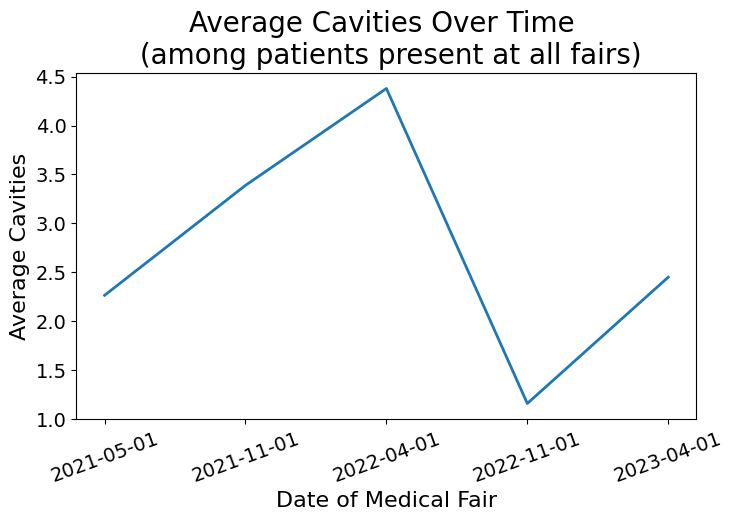

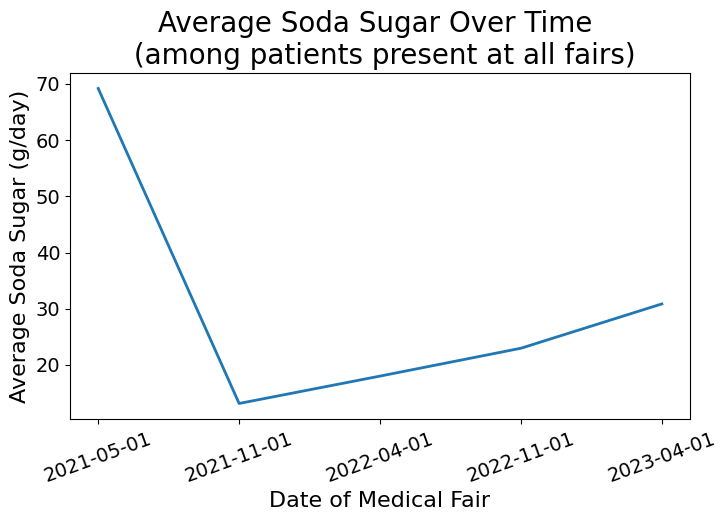

In [26]:
#Finding people who have been to all med fairs 
list = combined["Individual Id"].to_list() 
counts = {x:list.count(x) for x in list}

all = []
for id in np.unique(list): 
    if counts[id] == 5: 
        all.append(id)



all_fairs = combined[combined["Individual Id"].isin(all)]

print(all_fairs["Cavities"])

#all_fairs.loc[:, ["Cavities", "Soda Sugar", "Missing"]] = all_fairs[["Cavities", "Soda Sugar", "Missing"]].fillna(0)

all_fairs = all_fairs.sort_values("Individual Id")

bmi_list = []
cav_list = []
sugar_list = []
blood_sugar_list = []
missing_list = []

for date in np.sort(all_fairs["Date"].unique()): 
    df = all_fairs[all_fairs["Date"] == date]
    print("-------"*3 + f"ANALYSIS FOR DATE {date}" + "-------"*3)

    cavities = np.mean(df["Cavities"])
    print(f"Average cavities: {cavities}")
    cav_list.append(cavities)

    sugar = np.mean(df["Soda Sugar"])
    print(f"Average sugar: {sugar}")
    sugar_list.append(sugar)
    
    missing = np.mean(df["Missing"])
    #print(f"Average missing: {missing}")
    missing_list.append(missing)

tick = np.sort(all_fairs["Date"].unique())
plt.title("Average Cavities Over Time \n (among patients present at all fairs)")
plt.xticks([0, 1, 2, 3, 4], [tick[0], tick[1], tick[2], tick[3], tick[4]], rotation=20)
plt.xlabel("Date of Medical Fair")
plt.ylabel("Average Cavities")
plt.plot(cav_list)
plt.show()

plt.title("Average Soda Sugar Over Time \n (among patients present at all fairs)")
plt.xticks([0, 1, 2, 3, 4], [tick[0], tick[1], tick[2], tick[3], tick[4]], rotation=20)
plt.xlabel("Date of Medical Fair")
plt.ylabel("Average Soda Sugar (g/day)")
plt.plot(sugar_list)
plt.show()



---------------------ANALYSIS FOR DATE 2021-05-01---------------------
Average cavities: 2.652173913043478
Average sugar: 63.642857142857146
Average missing: 0.45454545454545453
---------------------ANALYSIS FOR DATE 2021-11-01---------------------
Average cavities: 4.238095238095238
Average sugar: 16.357142857142858
Average missing: 1.5
---------------------ANALYSIS FOR DATE 2022-04-01---------------------
Average cavities: 4.294117647058823
Average sugar: 21.53571428571429
Average missing: 4.0
---------------------ANALYSIS FOR DATE 2022-11-01---------------------
Average cavities: 1.434782608695652
Average sugar: 26.807142857142857
Average missing: 0.0
---------------------ANALYSIS FOR DATE 2023-04-01---------------------
Average cavities: 2.1
Average sugar: 37.12499999999999
Average missing: 0.0


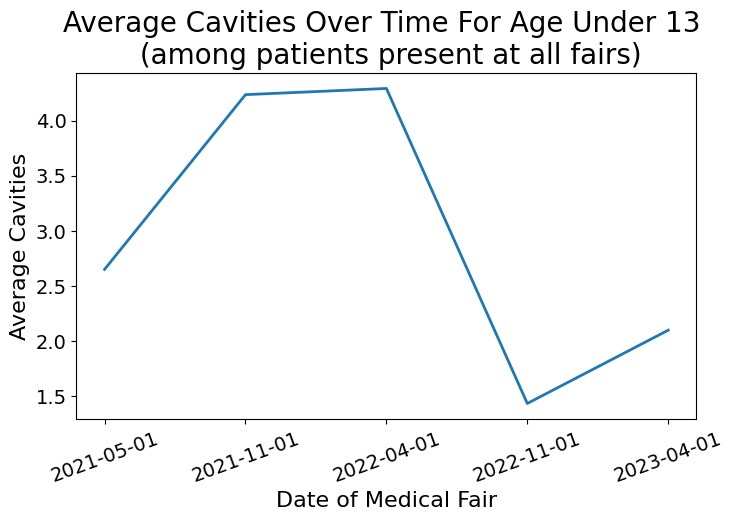

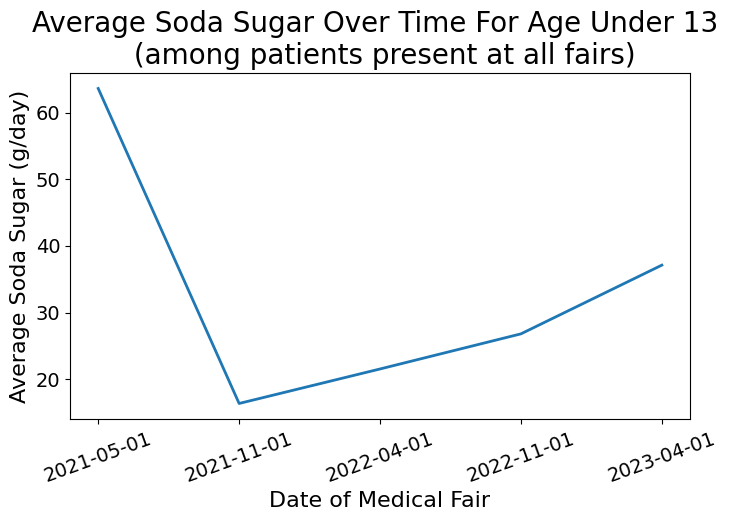

In [16]:
#Finding people who have been to all med fairs 
list = combined["Individual Id"].to_list() 
counts = {x:list.count(x) for x in list}

all = []
for id in np.unique(list): 
    if counts[id] == 5: 
        all.append(id)

all_fairs = combined[combined["Individual Id"].isin(all)]

all_fairs = all_fairs[all_fairs["Age At Fair"] < 13]

all_fairs = all_fairs.sort_values("Individual Id")

bmi_list = []
cav_list = []
sugar_list = []
blood_sugar_list = []
missing_list = []

for date in np.sort(all_fairs["Date"].unique()): 
    df = all_fairs[all_fairs["Date"] == date]
    print("-------"*3 + f"ANALYSIS FOR DATE {date}" + "-------"*3)

    cavities = np.mean(df["Cavities"])
    print(f"Average cavities: {cavities}")
    cav_list.append(cavities)

    sugar = np.mean(df["Soda Sugar"])
    print(f"Average sugar: {sugar}")
    sugar_list.append(sugar)
    
    missing = np.mean(df["Missing"])
    print(f"Average missing: {missing}")
    missing_list.append(missing)

tick = np.sort(all_fairs["Date"].unique())
plt.title("Average Cavities Over Time For Age Under 13 \n (among patients present at all fairs)")
plt.xticks([0, 1, 2, 3, 4], [tick[0], tick[1], tick[2], tick[3], tick[4]], rotation=20)
plt.xlabel("Date of Medical Fair")
plt.ylabel("Average Cavities")
plt.plot(cav_list)
plt.show()

plt.title("Average Soda Sugar Over Time For Age Under 13 \n (among patients present at all fairs)")
plt.xticks([0, 1, 2, 3, 4], [tick[0], tick[1], tick[2], tick[3], tick[4]], rotation=20)
plt.xlabel("Date of Medical Fair")
plt.ylabel("Average Soda Sugar (g/day)")
plt.plot(sugar_list)
plt.show()


---------------------ANALYSIS FOR DATE 2021-05-01---------------------
Average cavities: 1.4545454545454546
Average sugar: 78.04285714285714
Average missing: 0.7272727272727273
---------------------ANALYSIS FOR DATE 2021-11-01---------------------
Average cavities: 2.0
Average sugar: 7.59375
Average missing: 4.2
---------------------ANALYSIS FOR DATE 2022-04-01---------------------
Average cavities: 4.5
Average sugar: 16.294775510204083
Average missing: 5.375
---------------------ANALYSIS FOR DATE 2022-11-01---------------------
Average cavities: 0.7777777777777778
Average sugar: 15.870214285714287
Average missing: nan
---------------------ANALYSIS FOR DATE 2023-04-01---------------------
Average cavities: 2.736842105263158
Average sugar: 23.999999999999996
Average missing: 3.1052631578947367


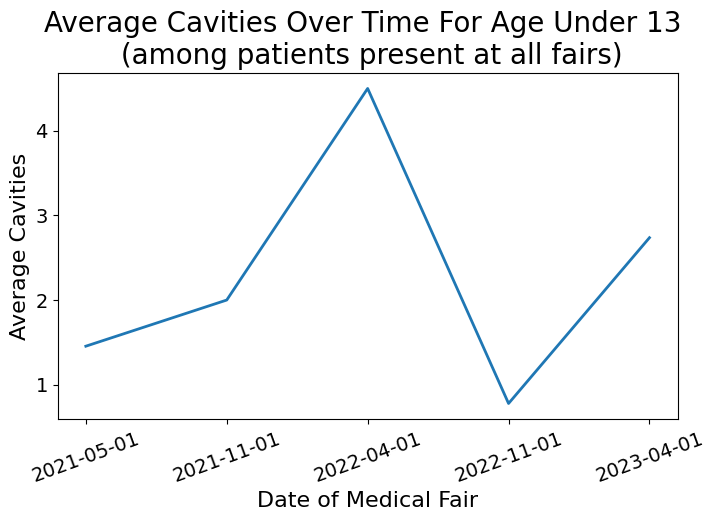

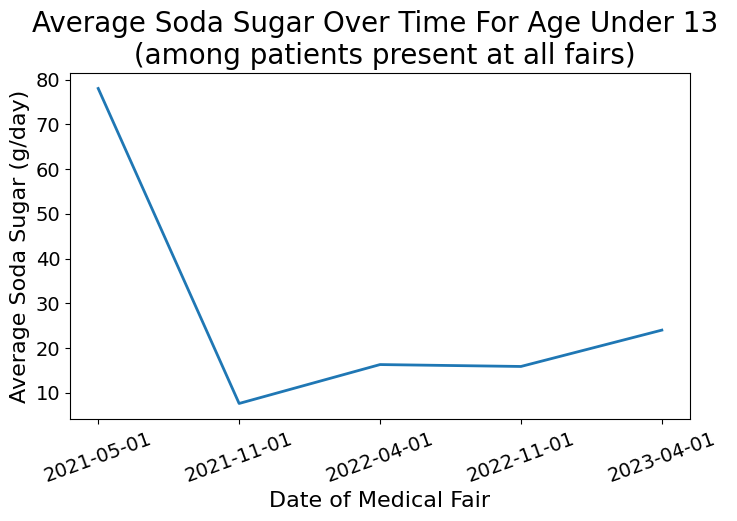

In [13]:
#Finding people who have been to all med fairs 
list = combined["Individual Id"].to_list() 
counts = {x:list.count(x) for x in list}

all = []
for id in np.unique(list): 
    if counts[id] == 5: 
        all.append(id)

all_fairs = combined[combined["Individual Id"].isin(all)]

all_fairs = all_fairs[all_fairs["Age At Fair"] > 13]

all_fairs = all_fairs.sort_values("Individual Id")

bmi_list = []
cav_list = []
sugar_list = []
blood_sugar_list = []
missing_list = []

for date in np.sort(all_fairs["Date"].unique()): 
    df = all_fairs[all_fairs["Date"] == date]
    print("-------"*3 + f"ANALYSIS FOR DATE {date}" + "-------"*3)

    cavities = np.mean(df["Cavities"])
    print(f"Average cavities: {cavities}")
    cav_list.append(cavities)

    sugar = np.mean(df["Soda Sugar"])
    print(f"Average sugar: {sugar}")
    sugar_list.append(sugar)
    
    missing = np.mean(df["Missing"])
    print(f"Average missing: {missing}")
    missing_list.append(missing)

tick = np.sort(all_fairs["Date"].unique())
plt.title("Average Cavities Over Time For Age Over 13 \n (among patients present at all fairs)")
plt.xticks([0, 1, 2, 3, 4], [tick[0], tick[1], tick[2], tick[3], tick[4]], rotation=20)
plt.xlabel("Date of Medical Fair")
plt.ylabel("Average Cavities")
plt.plot(cav_list)
plt.show()

plt.title("Average Soda Sugar Over Time For Age Over 13 \n (among patients present at all fairs)")
plt.xticks([0, 1, 2, 3, 4], [tick[0], tick[1], tick[2], tick[3], tick[4]], rotation=20)
plt.xlabel("Date of Medical Fair")
plt.ylabel("Average Soda Sugar (g/day)")
plt.plot(sugar_list)
plt.show()

---------------------ANALYSIS FOR DATE 2021-05-01---------------------
Average cavities: 2.0
Average sugar: 68.70800627943485
Average missing: 0.5217391304347826
---------------------ANALYSIS FOR DATE 2021-11-01---------------------
Average cavities: 3.1845238095238093
Average sugar: 23.29577551020408
Average missing: 3.740740740740741
---------------------ANALYSIS FOR DATE 2022-04-01---------------------
Average cavities: 4.257731958762887
Average sugar: 23.58048403361345
Average missing: 4.628571428571429
---------------------ANALYSIS FOR DATE 2022-11-01---------------------
Average cavities: 1.0814814814814815
Average sugar: 24.446886297376093
Average missing: 0.0
---------------------ANALYSIS FOR DATE 2023-04-01---------------------
Average cavities: 2.44375
Average sugar: 35.94928195488722
Average missing: 1.4430379746835442


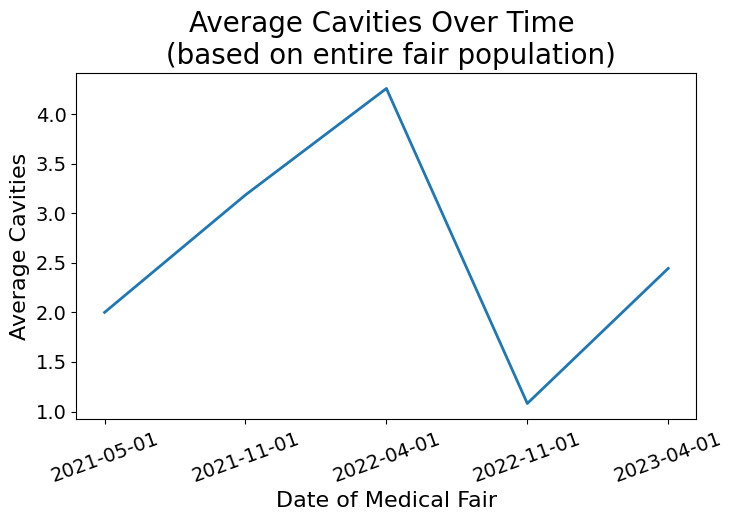

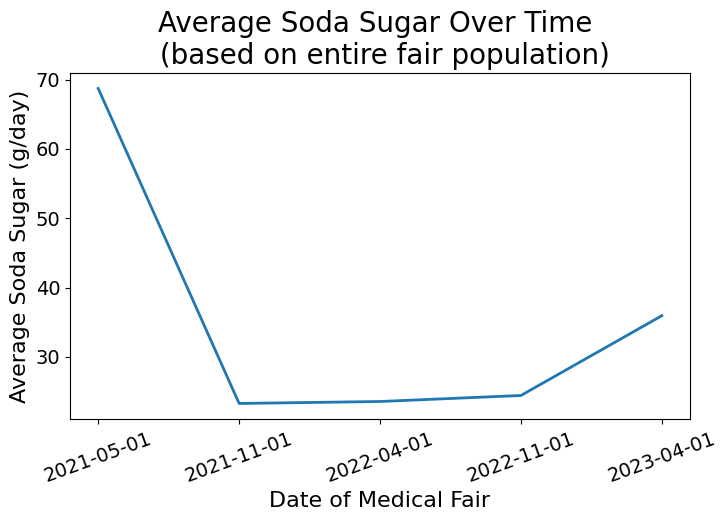

In [17]:
#Finding people who have been to all med fairs 
list = combined["Individual Id"].to_list() 
counts = {x:list.count(x) for x in list}

all = []
for id in np.unique(list): 
    if counts[id] == 5: 
        all.append(id)

all_fairs = combined[combined["Individual Id"].isin(all)]

all_fairs = combined

all_fairs = all_fairs.sort_values("Individual Id")

bmi_list = []
cav_list = []
sugar_list = []
blood_sugar_list = []
missing_list = []

for date in np.sort(all_fairs["Date"].unique()): 
    df = all_fairs[all_fairs["Date"] == date]
    print("-------"*3 + f"ANALYSIS FOR DATE {date}" + "-------"*3)

    cavities = np.mean(df["Cavities"])
    print(f"Average cavities: {cavities}")
    cav_list.append(cavities)

    sugar = np.mean(df["Soda Sugar"])
    print(f"Average sugar: {sugar}")
    sugar_list.append(sugar)
    
    missing = np.mean(df["Missing"])
    print(f"Average missing: {missing}")
    missing_list.append(missing)

tick = np.sort(all_fairs["Date"].unique())
plt.title("Average Cavities Over Time \n (based on entire fair population)")
plt.xticks([0, 1, 2, 3, 4], [tick[0], tick[1], tick[2], tick[3], tick[4]], rotation=20)
plt.xlabel("Date of Medical Fair")
plt.ylabel("Average Cavities")
plt.plot(cav_list)
plt.show()

plt.title("Average Soda Sugar Over Time \n (based on entire fair population)")
plt.xticks([0, 1, 2, 3, 4], [tick[0], tick[1], tick[2], tick[3], tick[4]], rotation=20)
plt.xlabel("Date of Medical Fair")
plt.ylabel("Average Soda Sugar (g/day)")
plt.plot(sugar_list)
plt.show()

Size of population: 49.0
---------------------ANALYSIS FOR DATE 2022-04-01---------------------
Average cavities: 4.183673469387755
---------------------ANALYSIS FOR DATE 2022-11-01---------------------
Average cavities: 1.530612244897959
---------------------ANALYSIS FOR DATE 2023-04-01---------------------
Average cavities: 3.4081632653061225


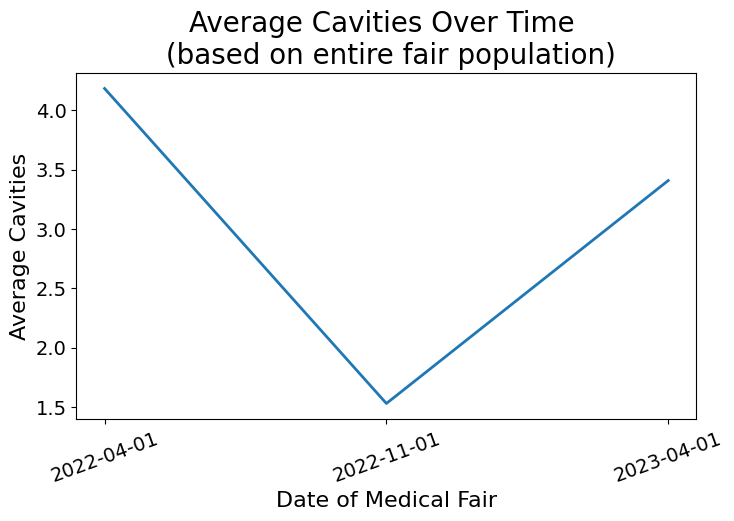

In [12]:
#Finding people who have been to all med fairs 

combined= pd.read_csv("../data/combined.csv")

recent_dates = [str(datetime.date(2022, 4, 1)), str(datetime.date(2022, 11, 1)), str(datetime.date(2023, 4, 1))]

combined = combined[combined["Date"].isin(recent_dates)]

no_na = combined.dropna(axis="index", subset="Cavities")

list = no_na["Individual Id"].to_list() 
counts = {x:list.count(x) for x in list}

all = []
for id in np.unique(list): 
    if counts[id] == 3: 
        all.append(id)

all_fairs = no_na[no_na["Individual Id"].isin(all)]
all_fairs.sort_values("Individual Id")

print(f"Size of population: {all_fairs.shape[0]/3}")


cav_list = []
for date in np.sort(all_fairs["Date"].unique()): 
    df = all_fairs[all_fairs["Date"] == date]
    print("-------"*3 + f"ANALYSIS FOR DATE {date}" + "-------"*3)
    cavities = np.mean(df["Cavities"])
    print(f"Average cavities: {cavities}")
    cav_list.append(cavities)

tick = np.sort(all_fairs["Date"].unique())
plt.title("Average Cavities Over Time \n (based on entire fair population)")
#plt.xticks([0, 1, 2, 3, 4], [tick[0], tick[1], tick[2], tick[3], tick[4]], rotation=20)
plt.xticks([0, 1, 2], [tick[0], tick[1], tick[2]], rotation=20)
plt.xlabel("Date of Medical Fair")
plt.ylabel("Average Cavities")
plt.plot(cav_list)
plt.show()


We only have complete data on cavities for 15 people. Their results follow the same trend that we see when observing the entire population.

If I only include the last 4 fairs, n=

If I only include the last three fairs, n=49. 

